<a href="https://colab.research.google.com/github/Wanderson23/Machine-Learning-Python/blob/main/M%C3%A9tricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

Função para calcular métricas a partir dos valores VP, VN, FP e FN

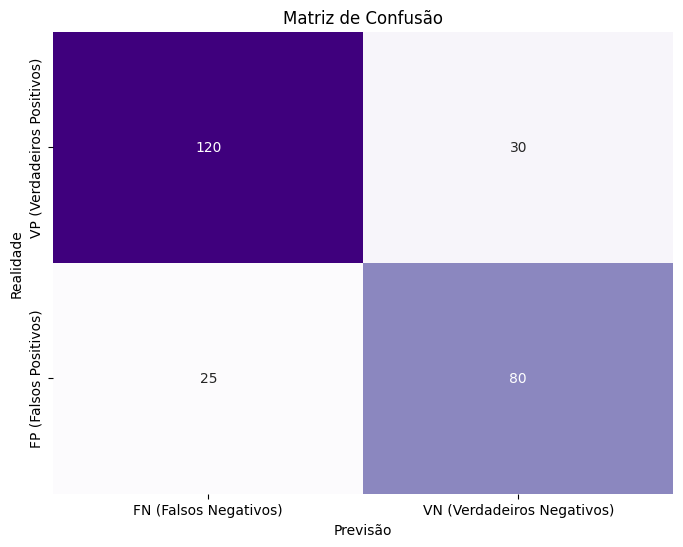

In [4]:
def calcular_metricas(vp, vn, fp, fn):
    # Cálculos baseados nas fórmulas da tabela
    sensibilidade = vp / (vp + fn) if (vp + fn) != 0 else 0
    especificidade = vn / (fp + vn) if (fp + vn) != 0 else 0
    acurácia = (vp + vn) / (vp + vn + fp + fn) if (vp + vn + fp + fn) != 0 else 0
    precisao = vp / (vp + fp) if (vp + fp) != 0 else 0
    f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade) if (precisao + sensibilidade) != 0 else 0


 # Cálculo da curva ROC
    true_labels = [1] * 50 + [0] * 50  # 50 positivos e 50 negativos
    predicted_scores = np.concatenate([np.random.uniform(0.7, 1, 50), np.random.uniform(0, 0.3, 50)])  # Separação mais clara


    fpr, tpr, thresholds = roc_curve(true_labels, predicted_scores)
    roc_auc = auc(fpr, tpr)  # Cálculo da área sob a curva

    # Retorna as métricas calculadas
    return {
        "Sensibilidade (Recall)": sensibilidade,
        "Especificidade": especificidade,
        "Acurácia": acurácia,
        "Precisão": precisao,
        "F-score": f_score,
        "AUC (Área sob a Curva ROC)": roc_auc
    }

# VP: 50, VN: 40, FP: 10, FN: 5 (modifique os valores conforme necessário)
vp = 120  # Verdadeiros Positivos
vn = 80  # Verdadeiros Negativos
fp = 25  # Falsos Positivos
fn = 30   # Falsos Negativos

# Calcula as métricas usando a função
metricas = calcular_metricas(vp, vn, fp, fn)

# Convertendo a matriz em Dataframe com pandas e exibindo a matriz de confusão com seaborn
matriz_confusao = np.array([[vp, fn], [fp, vn]])
df_matriz_confusao = pd.DataFrame(
    matriz_confusao,
    index=["VP (Verdadeiros Positivos)", "FP (Falsos Positivos)"],
    columns=["FN (Falsos Negativos)", "VN (Verdadeiros Negativos)"]
)
plt.figure(figsize=(8, 6))
sns.heatmap(df_matriz_confusao, annot=True, fmt="d", cmap="Purples", cbar=False)
plt.title("Matriz de Confusão")
plt.ylabel("Realidade")
plt.xlabel("Previsão")
plt.show()



Matriz de confusão arbitrária


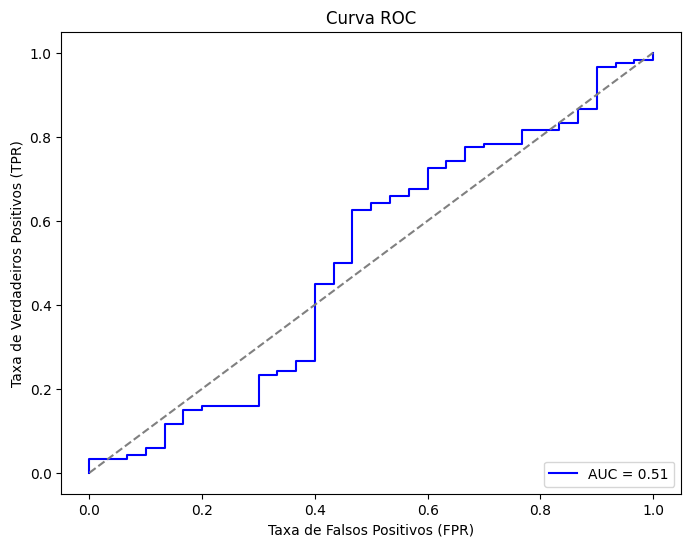

In [5]:
# Função para plotar a curva ROC
def plotar_curva_roc(vp, fp, fn, vn):
  # Geração de escores variáveis para simular previsões de um modelo
    true_labels = [1] * vp + [0] * fn
    predicted_scores = np.random.uniform(0, 1, len(true_labels))  # Gera escores entre 0 e 1


    # Calcular FPR e TPR com esses escores
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_scores)
    roc_auc = auc(fpr, tpr)  # Cálculo da área sob a curva

    # Plotando a curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Linha de aleatoriedade
    plt.title('Curva ROC')
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.legend(loc='lower right')
    plt.show()

# Calculando e plotando a curva ROC
plotar_curva_roc(vp, fp, fn, vn)

In [6]:
# Exibe os resultados das métricas
print("Métricas de Avaliação:")
for nome, valor in metricas.items():
    print(f"{nome}: {valor:.2f}")

Métricas de Avaliação:
Sensibilidade (Recall): 0.80
Especificidade: 0.76
Acurácia: 0.78
Precisão: 0.83
F-score: 0.81
AUC (Área sob a Curva ROC): 1.00
